In [1]:
# Created by Marc Merih Atasoy, 2020

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as m
import random
import statistics as stat

In [3]:
# Legend & Controls

numberOfIters = 10000 # Length of monte carlo simulation
boxes = 6 # Number of weekly chunks that project is divided in.
iterationResults = [] # Going to have 10,000 arrays, each containing 6 boxResult arrays.
dailyProbabilityOfInfection = 1 # Given in percentages (%)

#Example:
# iterationResults(i,j) = [[x11,x12,x13,x14,x15,x16],[x21,x22,x23,x24,x25x,26],...,[x100001,x100002,x100003,..,x100006]]

In [4]:
# Monte Carlo Simulation

random.seed(15) # Create a seed for consistent psuedo-random number generation

for iter in range(numberOfIters): # Run numer_of_iters iterations
    boxResult = [] # The array representing the number of days for the ith iteration, in the jth box.
    for box in range(boxes):
        numberOfTotalDays = 0
        numberOfWorkedDays = 0
        while (numberOfWorkedDays < 66):
            randomVariable = random.randint(0,100) # Generate a random variable between 0 and 100.
            if (randomVariable <= (100 - dailyProbabilityOfInfection)):
                numberOfWorkedDays += 1
                numberOfTotalDays += 1
            else:
                if (box < 2): # The quarantine period for commodity boxes are 5 days, since they can be easily replaced.
                    numberOfTotalDays += 5
                else: # The quarantine period for commodity boxes are 2 weeks (14 days).
                    numberOfTotalDays += 14
        boxResult.append(numberOfTotalDays) # In days.
    iterationResults.append(boxResult) # In arrays of days.
print("Finished Monte Carlo Simulation")

Finished Monte Carlo Simulation


In [5]:
# Calculating arrays of total number of days and total number of weeks across all iterations.

totalDaysPerIter = []
totalWeeksPerIter = []
for iter in iterationResults:
    totalDays = sum(iter)
    totalDaysPerIter.append(totalDays)
    totalWeeksPerIter.append(totalDays / 6)

The average duration for construction works (in days) across 10000 iterations is: 
440

The standard deviation of duration for construction works (in days) across 10000 iterations is: 
23.7

The average duration for construction works (in weeks) across 10000 iterations is: 
73.3

The standard deviation of duration for construction works (in weeks) across 10000 iterations is: 
3.95

The average duration of construction works  by box (in weeks) across 10000 is: 
[11.546416666666666, 11.558083333333334, 12.5379, 12.566833333333333, 12.547699999999999, 12.545133333333332]

The expected number of work days until first infection occurring is: 
100 , with standard deviation:  99.5


---------------------------- GRAPHS AND HISTOGRAMS ----------------------------

The histogram of total project duration (in weeks): 



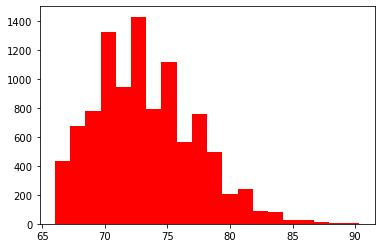

In [6]:
# Statistics Calculations

# Expected total duration calculations
averageProjectDurationDays = stat.mean(totalDaysPerIter)
averageProjectDurationWeeks = stat.mean(totalWeeksPerIter)

# Standard deviation for duration calculations
stdDevProjectDurationDays = stat.stdev(totalDaysPerIter)
stdDevProjectDurationWeeks = stat.stdev(totalWeeksPerIter)

# Expected duration calculations per box
byBoxResults = [] # in days
for box in range(boxes):
    currBox = []
    for iter in range(numberOfIters):
        currBox.append(iterationResults[iter][box])
    byBoxResults.append(currBox)

boxAverages = [] # in weeks
for box in range(boxes):
    boxAverages.append((stat.mean(byBoxResults[box]) / 6))

# Duration to first infection calculations
geometricRVexpectedValue = (1 / (dailyProbabilityOfInfection / 100))
geometricRVvar = (1 - (dailyProbabilityOfInfection / 100)) / (dailyProbabilityOfInfection / 100)**2
geometricRVstdDev = m.sqrt(geometricRVvar)

# Print statements
print("The average duration for construction works (in days) across", numberOfIters, "iterations is: ")
print('{0:.3g}'.format(averageProjectDurationDays))
print("\nThe standard deviation of duration for construction works (in days) across", numberOfIters, "iterations is: ")
print('{0:.3g}'.format(stdDevProjectDurationDays))
print("\nThe average duration for construction works (in weeks) across", numberOfIters, "iterations is: ")
print('{0:.3g}'.format(averageProjectDurationWeeks))
print("\nThe standard deviation of duration for construction works (in weeks) across", numberOfIters, "iterations is: ")
print('{0:.3g}'.format(stdDevProjectDurationWeeks))
print("\nThe average duration of construction works  by box (in weeks) across", numberOfIters, "is: ")
print(boxAverages)
print("\nThe expected number of work days until first infection occurring is: ")
print('{0:.3g}'.format(geometricRVexpectedValue), ", with standard deviation: ", '{0:.3g}'.format(geometricRVstdDev))
print("")

# Graphs and histograms
print("\n---------------------------- GRAPHS AND HISTOGRAMS ----------------------------")

print("\nThe histogram of total project duration (in weeks): \n")
_ = plt.hist(totalWeeksPerIter, bins = 20, color = 'red')

The cumulative histogram of total project duration (in weeks): 


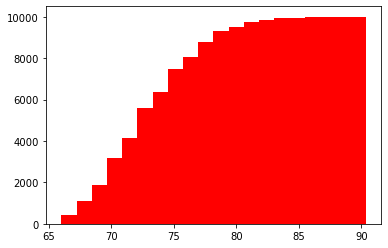

In [57]:
print("The cumulative histogram of total project duration (in weeks): ")
_ = plt.hist(totalWeeksPerIter, bins = 20, cumulative = 'true', histtype = 'stepfilled', color = 'red')

The cumulative distribution function for number of weeks is: 


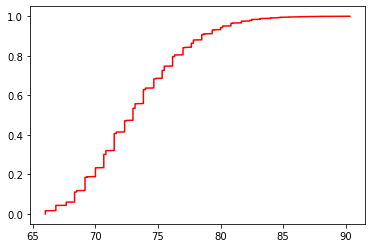

In [58]:
# Cumulative distribution function (CDF)

print("The cumulative distribution function for number of weeks is: ")
sortedTotalWeeks = np.sort(totalWeeksPerIter)
freq = []
for iter in range(numberOfIters):
    freq.append(iter/numberOfIters)
    
_ = plt.plot(sortedTotalWeeks, freq, color="r")